In [1]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [3]:
np.random.seed(1)
m = 400 # 样本数量
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

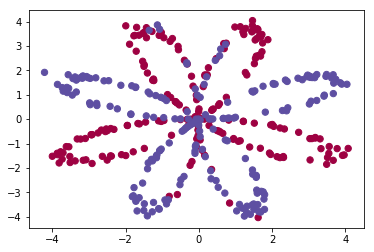

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [5]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

In [6]:
w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

optimizer = torch.optim.SGD([w, b], 1e-1)

def logistic_regression(x):
    return torch.mm(x, w) + b

criterion = nn.BCEWithLogitsLoss()

In [7]:
for e in range(100):
    out = logistic_regression(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 20 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

epoch: 20, loss: 1.1820807456970215
epoch: 40, loss: 0.7492873668670654
epoch: 60, loss: 0.6762452125549316
epoch: 80, loss: 0.673265278339386
epoch: 100, loss: 0.6731646060943604


In [8]:
def plot_logistic(x):
    x = Variable(torch.from_numpy(x).float())
    out = F.sigmoid(logistic_regression(x))
    out = (out > 0.5) * 1
    return out.data.numpy()

D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


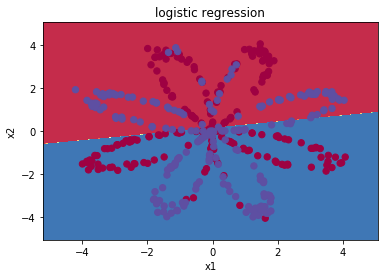

In [9]:
plot_decision_boundary(lambda x: plot_logistic(x), x.numpy(), y.numpy())
plt.title('logistic regression')

In [10]:
# 定义两层神经网络的参数
w1 = nn.Parameter(torch.randn(2, 4) * 0.01) # 隐藏层神经元个数 2
b1 = nn.Parameter(torch.zeros(4))

w2 = nn.Parameter(torch.randn(4, 1) * 0.01)
b2 = nn.Parameter(torch.zeros(1))

# 定义模型
def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1) # 使用 PyTorch 自带的 tanh 激活函数
    x2 = torch.mm(x1, w2) + b2
    return x2

optimizer = torch.optim.SGD([w1, w2, b1, b2], 1.)

criterion = nn.BCEWithLogitsLoss()

In [11]:

# 我们训练 10000 次
for e in range(10000):
    out = two_network(Variable(x))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch: 1000, loss: 0.2926594018936157
epoch: 2000, loss: 0.2781040668487549
epoch: 3000, loss: 0.26832783222198486
epoch: 4000, loss: 0.2359040081501007
epoch: 5000, loss: 0.22785522043704987
epoch: 6000, loss: 0.223676860332489
epoch: 7000, loss: 0.22087092697620392
epoch: 8000, loss: 0.2187526524066925
epoch: 9000, loss: 0.2170465886592865
epoch: 10000, loss: 0.21563121676445007


In [12]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


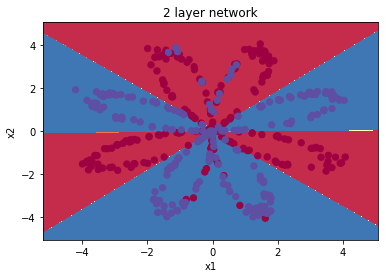

In [13]:

plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')

Sequential 和 Module

In [15]:
seq_net=nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1)
)

In [16]:
seq_net[0]

Linear(in_features=2, out_features=4, bias=True)

In [17]:
w0=seq_net[0].weight
print(w0)

Parameter containing:
tensor([[-0.0744, -0.5842],
        [-0.3344,  0.0238],
        [ 0.0725,  0.6627],
        [ 0.1463, -0.6568]], requires_grad=True)


In [18]:
# 通过paramter是获得模型的更多参数
param=seq_net.parameters()
optim=torch.optim.SGD(param,1.)


In [19]:
for e in range(10000):
    out=seq_net(Variable(x))
    loss=criterion(out,Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

epoch: 1000, loss: 0.2851824164390564
epoch: 2000, loss: 0.27257969975471497
epoch: 3000, loss: 0.26542767882347107
epoch: 4000, loss: 0.2598930597305298
epoch: 5000, loss: 0.23448745906352997
epoch: 6000, loss: 0.22572994232177734
epoch: 7000, loss: 0.22202163934707642
epoch: 8000, loss: 0.21959176659584045
epoch: 9000, loss: 0.21774128079414368
epoch: 10000, loss: 0.21622724831104279


In [20]:
def plot_seq(x):
    out = F.sigmoid(seq_net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


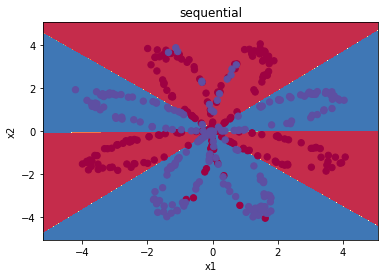

In [21]:

plot_decision_boundary(lambda x: plot_seq(x), x.numpy(), y.numpy())
plt.title('sequential')

In [22]:
# 保存模型的两种  保存全部的参数（结构和参数）
torch.save(seq_net,'save_seq_net.pth')

In [23]:
save_seq_net1=torch.load('save_seq_net.pth')

In [24]:
save_seq_net1

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [26]:
print(save_seq_net1[0].weight)

Parameter containing:
tensor([[  9.4274,  -2.9480],
        [-10.4366, -12.2518],
        [ -0.1030,   9.5271],
        [  8.8450,  -9.7470]], requires_grad=True)


In [27]:
##  只保留参数

torch.save(seq_net.state_dict(),'save_seq_net_params.pth')

In [28]:
seq_net2=nn.Sequential(
    nn.Linear(2,4),
    nn.Tanh(),
    nn.Linear(4,1)
)
seq_net2.load_state_dict(torch.load('save_seq_net_params.pth'))

In [29]:
seq_net2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [30]:

print(seq_net2[0].weight)

Parameter containing:
tensor([[  9.4274,  -2.9480],
        [-10.4366, -12.2518],
        [ -0.1030,   9.5271],
        [  8.8450,  -9.7470]], requires_grad=True)


In [33]:
class module_net(nn.Module):
    def __init__(self,num_input,num_hidden,num_output):
        super(module_net,self).__init__()
        self.layer1=nn.Linear(num_input,num_hidden)
        self.layer2=nn.Tanh()
        self.layer3=nn.Linear(num_hidden,num_output)
        
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        return x

In [34]:
mo_net=module_net(2,4,1)

In [35]:
l1=mo_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [36]:
print(l1.weight)

Parameter containing:
tensor([[ 0.1734,  0.3332],
        [ 0.2604, -0.6815],
        [ 0.6371, -0.5188],
        [-0.4875, -0.2053]], requires_grad=True)


In [39]:
optim = torch.optim.SGD(mo_net.parameters(), 2.)

In [40]:
for e in range(10000):
    out = mo_net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

epoch: 1000, loss: 0.2568292021751404
epoch: 2000, loss: 0.2549687623977661
epoch: 3000, loss: 0.2540133595466614
epoch: 4000, loss: 0.25324490666389465
epoch: 5000, loss: 0.2526036500930786
epoch: 6000, loss: 0.25205880403518677
epoch: 7000, loss: 0.2515893876552582
epoch: 8000, loss: 0.25117945671081543
epoch: 9000, loss: 0.2508174180984497
epoch: 10000, loss: 0.25049400329589844


In [41]:
torch.save(mo_net.state_dict(), 'module_net.pth')

In [42]:

net = nn.Sequential(
    nn.Linear(2, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 10),
    nn.Tanh(),
    nn.Linear(10, 1)
)

optim = torch.optim.SGD(net.parameters(), 0.1)

In [43]:
# 我们训练 20000 次
for e in range(20000):
    out = net(Variable(x))
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data))

epoch: 1000, loss: 0.30844739079475403
epoch: 2000, loss: 0.21764476597309113
epoch: 3000, loss: 0.20137152075767517
epoch: 4000, loss: 0.1908303052186966
epoch: 5000, loss: 0.1815834790468216
epoch: 6000, loss: 0.17327599227428436
epoch: 7000, loss: 0.16675645112991333
epoch: 8000, loss: 0.1622208058834076
epoch: 9000, loss: 0.1588926762342453
epoch: 10000, loss: 0.1560227870941162
epoch: 11000, loss: 0.1532955914735794
epoch: 12000, loss: 0.15058916807174683
epoch: 13000, loss: 0.14783908426761627
epoch: 14000, loss: 0.14520145952701569
epoch: 15000, loss: 0.14279626309871674
epoch: 16000, loss: 0.140380859375
epoch: 17000, loss: 0.1379365772008896
epoch: 18000, loss: 0.13565154373645782
epoch: 19000, loss: 0.1336255520582199
epoch: 20000, loss: 0.13186827301979065


D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


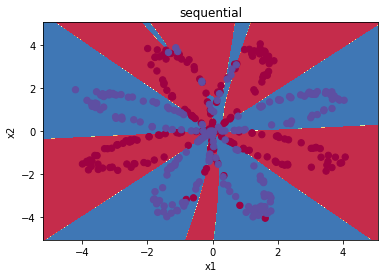

In [44]:
def plot_net(x):
    out = F.sigmoid(net(Variable(torch.from_numpy(x).float()))).data.numpy()
    out = (out > 0.5) * 1
    return out

plot_decision_boundary(lambda x: plot_net(x), x.numpy(), y.numpy())
plt.title('sequential')